In [1]:
import pandas as pd #working with dataframes
import numpy as np #numerical operations
import seaborn as sns #visualization

In [2]:
#Importing dataset 
income_data = pd.read_csv('terror_dataset.csv')

#Creating a copy of OG data
data = income_data.copy()

c:\users\swathilakshmi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1. Getting to know the data

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None


In [4]:
#Checking for missing values
data.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [5]:
print('Missing values in the columns are: \n',data.isnull().sum())

Missing values in the columns are: 
 eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [6]:
#Summary of Numerical Values
summ_num = data.describe()
print(summ_num)

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [7]:
#Summary of Categorical Values
summ_cat = data.describe(include="O")
print(summ_cat)

                   approxdate resolution country_txt  \
count                    9239       2220      181691   
unique                   2244       1859         205   
top     September 18-24, 2016   8/4/1998        Iraq   
freq                      101         18       24636   

                        region_txt provstate     city  \
count                       181691    181270   181257   
unique                          12      2854    36674   
top     Middle East & North Africa   Baghdad  Unknown   
freq                         50474      7645     9775   

                                                location  \
count                                              55495   
unique                                             44109   
top     The attack took place in Baghdad, Baghdad, Iraq.   
freq                                                 142   

                                                  summary  \
count                                              115562   
unique    

In [8]:
#Frequencies of each category 
data['alternative_txt'].value_counts()

Insurgency/Guerilla Action    23410
Other Crime Type               3665
Intra/Inter-group Conflict     1296
State Actors                    321
Lack of Intentionality          319
Name: alternative_txt, dtype: int64

In [9]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [10]:
#Checking unique classes
print(np.unique(data['attacktype1_txt'])) #There exists ? instead of nan

['Armed Assault' 'Assassination' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Hijacking'
 'Hostage Taking (Barricade Incident)' 'Hostage Taking (Kidnapping)'
 'Unarmed Assault' 'Unknown']


## 2. Cross-tables and Data Visualization

In [11]:
#Extracting the column names 
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [12]:
#Country proportion table
country = pd.crosstab(index = data["country_txt"], columns = 'count', normalize = True)
print(country)

col_0           count
country_txt          
Afghanistan  0.070070
Albania      0.000440
Algeria      0.015097
Andorra      0.000006
Angola       0.002746
...               ...
Yemen        0.018421
Yugoslavia   0.001117
Zaire        0.000275
Zambia       0.000341
Zimbabwe     0.000556

[205 rows x 1 columns]


In [13]:
#Attack Type vs Country
count_atttype = pd.crosstab(index = data["country_txt"], columns = data['attacktype1_txt'], margins = True, normalize = 'index')
print(count_atttype)

attacktype1_txt  Armed Assault  Assassination  Bombing/Explosion  \
country_txt                                                        
Afghanistan           0.225984       0.074935           0.490535   
Albania               0.137500       0.175000           0.600000   
Algeria               0.332847       0.157127           0.396646   
Andorra               1.000000       0.000000           0.000000   
Angola                0.248497       0.056112           0.513026   
...                        ...            ...                ...   
Yugoslavia            0.453202       0.103448           0.349754   
Zaire                 0.280000       0.140000           0.220000   
Zambia                0.306452       0.112903           0.483871   
Zimbabwe              0.217822       0.257426           0.336634   
All                   0.234844       0.106290           0.485742   

attacktype1_txt  Facility/Infrastructure Attack  Hijacking  \
country_txt                                          

c:\users\swathilakshmi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


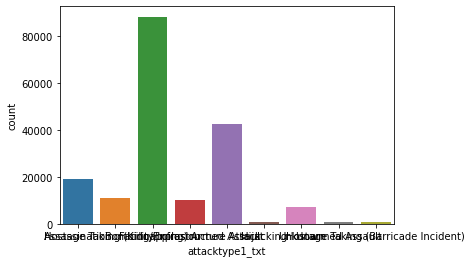

In [14]:
#Frequency Distribution of "Attack Type"
attack_type = sns.countplot(data['attacktype1_txt'])
print(attack_type)

<AxesSubplot:xlabel='attacktype1'>

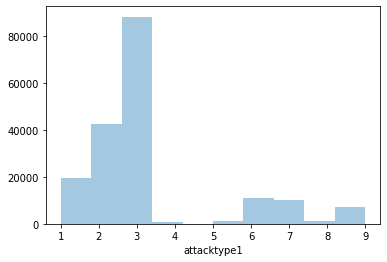

In [19]:
#Histogram of attack type
sns.distplot(data['attacktype1'], bins=10, kde=False)